# (연습) 이산 확률 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 타이타닉 데이터셋

타이타닉호의 승객에 대한 정보와 생존 여부를 담은 데이터셋을 불러온다.

In [7]:
titanic = pd.read_csv(data_url+"titanic.csv")

각 생존자별로 12개의 정보가 포함된다.

| 특성 | 의미 |
| :--- | :--- |
| PassengerId  | 승객 번호 |
| Survived | 생존 여부. 0 또는 1. 1일 때 생존 |
| Pclass | 승객 클래스 |
| Name | 승객 이름 |
| Sex | 승객의 성 |
| Age | 승객 나이 |
| SibSp | 타이타닉에 함께 승선한 형제자매와 배우자의 수 |
| Parch | 타이타닉에 함께 승선한 자녀와 부모의 수 |
| Ticket | 티켓 번호 |
| Fare | 티켓 요금(영구 파운드화) |
| Cabin | 객실 번호 |
| Embarked | 승객이 타이타닉호에 승선한 항구 |
| | C=Cherbourg, Q=Queenstown, S=Southampton |

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


먼저 `PassengerId` 특성을 인덱스로 지정한다.

In [9]:
titanic = titanic.set_index("PassengerId")
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


데이터셋의 크기인 891보다 적은 수의 `non-null` 값을 갖는 특성에 결측치가 존재한다.

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


`Embarked` 특성의 결측치를 모두 해당 특성의 최빈값으로 대체한다.

In [11]:
embarked_mode =(titanic['Embarked'].mode().values)[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)

`Age` 특성의 결측치를 성(Sex)별 중앙값으로 대체한다.

In [12]:
f_mask = titanic["Sex"]=="female"
f_age_median = titanic.loc[f_mask, "Age"].median()
print("여성 평균연령:", f_age_median)

여성 평균연령: 27.0


In [13]:
m_age_median = titanic.loc[~f_mask, "Age"].median()
print("남성 평균연령:", m_age_median)

남성 평균연령: 29.0


In [14]:
titanic.loc[f_mask, 'Age'] = titanic.loc[f_mask, 'Age'].fillna(f_age_median)
titanic.loc[~f_mask, 'Age'] = titanic.loc[~f_mask, 'Age'].fillna(m_age_median)

`Cabin` 특성을 제외한 모든 결측치가 사라졌음을 확인한다.

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**문제 1**

아래 코드는 `Age` 특성을 10살 단위로 구분하는 연령구간을 지정하여 `Age_Bucket` 특성으로 추가한다.

In [16]:
titanic['Age_Bucket'] = (titanic["Age"] // 10 * 10).astype('i8')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bucket
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,20


확률 변수 $X$가 타이타닉 데이터셋에서 임의로 선택된 사람의 나이대를 가리킨다고 하자.

(1) 확률 변수 $X$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

답:

[이산 확률 분포](file:///C:/Users/gslee/Documents/GitHub/DataSci/jupyter-book/_build/html/probability_discrete.html)에서
`prob_income`을 정의한 방식과 동일하게 진행한다.
먼저 나이대로 그룹화하고 구간별 도수와 상대도수를 확인한다.

In [17]:
age_stratified_count = titanic.loc[:, ['Age_Bucket', 'Age']].groupby('Age_Bucket', observed=True, group_keys=True).count()
age_stratified_ratio = age_stratified_count / len(titanic)
age_stratified_ratio

,Age
Age_Bucket,
0,0.069585
10,0.114478
20,0.445567
30,0.187430
40,0.099888
50,0.053872
60,0.021324
70,0.006734
80,0.001122


In [18]:
# 데이터프레임으로 변환
prob_age = age_stratified_ratio.iloc[:, 0:1]
# 컬럼과 인덱스 이름 지정
prob_age.columns = ['확률']
prob_age.index.name = 'X'

# 가로형의 데이터프레임으로 변환
prob_age = prob_age.T
prob_age

X,0,10,20,30,40,50,60,70,80
확률,0.069585,0.114478,0.445567,0.18743,0.099888,0.053872,0.021324,0.006734,0.001122


(2) 확률 변수 $X$의 확률 분포가 확률의 성질을 만족함을 보이는 코드를 작성하여라.

답:

- 모든 확률은 0과 1사이의 값

In [19]:
(0 <= prob_age) & (prob_age <= 1)

X,0,10,20,30,40,50,60,70,80
확률,True,True,True,True,True,True,True,True,True


- 모든 확률의 합은 1

In [20]:
prob_age

X,0,10,20,30,40,50,60,70,80
확률,0.069585,0.114478,0.445567,0.18743,0.099888,0.053872,0.021324,0.006734,0.001122


In [21]:
prob_age.sum(axis=1)

확률    1.0
dtype: float64

(3) 확률 변수 $X$의 확률 질량 함수를 선언한 다음에 30대에 포함될 확률을 계산하여라.

답:

나이대의 PMF는 다음과 같이 정의할 수 있다.

In [22]:
def f_age(x):
    return prob_age[x].iloc[0]

- 30대에 포함될 확률

In [23]:
f_age(30)

0.187430

(4) 확률 변수$X$의 누적 분포 함수를 선언하고, 50대 이하에 속할 확률을 계산하여라.

답:

나이대의 CDF 또한 `prob_age`를 이용하여 정의된다.

In [24]:
def age_cdf(x):
    return np.sum([prob_age[x_k] for x_k in prob_age.columns if x_k <= x])

- 임의의 나이대에 속할 확률은 1

In [25]:
age_cdf(80)

1.000000

 - 50대 이하에 속할 확률

In [26]:
age_cdf(50)

0.970819

**문제 2**

`Embarked` 특성은 승객이 탑승한 항구를 구분한다.

In [27]:
titanic.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

각 기호가 가리키는 항구와 방문 순서는 다음과 같다.

| 순서 | 기호 | 항구 |
| :---: | :---: | :--- |
| 1 | Q | Queenstown(퀸즈타운, 영국) |
| 2 | C | Cherbourg(쉘부르, 프랑스) |
| 3 | S | Southampton(사우스햄튼, 아일랜드) |

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/Titanic_voyage.png" style="width:950px"></div></p>

확률 변수 $Y$가 `Embarked` 특성의 값을 가리키도록 한다.

(1) 확률 변수 $Y$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

답:

`Embarked` 특성은 범주형이기에 굳이 `groupby()` 메서드를 적용할 필요 없이
`value_count()` 메서드를 활용한다.
다만 생성된 시리즈를 적절한 데이터프레임으로 변경해야 한다.

In [28]:
# 범주별 도수와 상대도수 확인
count_embarked = titanic.loc[:, 'Embarked'].value_counts()
prob_embarked = pd.DataFrame(count_embarked) / len(titanic)

# 열 이름과 인덱스 이름 지정
prob_embarked.columns = ['확률']
prob_embarked.index.name = 'Y'

# 가로형의 데이터프레임으로 변환
prob_embarked = prob_embarked.T
prob_embarked

Y,S,C,Q
확률,0.725028,0.188552,0.08642


(2) 확률 변수 $Y$의 확률 질량 함수를 선언한 다음에 쉘부르(Cherbourg)에서 승객이 탑승했을 확률을 계산하여라.

답:

In [29]:
def f_embarked(x):
    return prob_embarked[x].iloc[0]

- 쉘부르(Cherbourg)에서 승선했을 확률

In [30]:
f_embarked('C')

0.188552

(3) 이산 결합 확률 변수 $(X, Y)$의 이산 결합 확률 밀도 함수 `p_XY()`를 구현한 다음에
임의로 선택된 승객이 20대이면서 퀸스타운(Queenstown)에서 탑승했을 확률을 계산하여라.

답:

먼저 나이대 범주와 탑승 항구만으로 구성된 데이터프레임을 구성한다.

In [31]:
two_cats = titanic.loc[:, ['Age_Bucket', 'Embarked']]
two_cats

,Age_Bucket,Embarked
PassengerId,,
1,20,S
2,30,C
3,20,S
4,30,S
5,30,S
...,...,...
887,20,S
888,10,S
889,20,S


`pd.crosstab()` 함수를 적용하면 두 범주 특성에 대한 교차표cross table를 생성한다. 교차표엔 두 범주 특성의 가능한 모든 조합에 대한 도수가 포함된다.

- `margins=True` 키워드 인자: 행과 열별 도수의 합 포함

In [32]:
cats_crossed = pd.crosstab(two_cats.iloc[:, 0], two_cats.iloc[:, 1], margins=True)
cats_crossed

Embarked,C,Q,S,All
Age_Bucket,,,,
0,9,4,49,62
10,20,6,76,102
20,76,54,267,397
30,28,7,132,167
40,17,3,69,89
50,13,1,34,48
60,3,1,15,19
70,2,1,3,6
80,0,0,1,1


나이대와 탑승 항구 범주의 결합 확률 분포를 따르는 결합 확률 질량 함수는 따라서 다음과 같이 정의 된다.

In [33]:
def p_XY(x, y):
    count = cats_crossed.loc[x, y]
    pop = cats_crossed.loc['All', 'All']
    return count / pop

- 임의로 선택된 승객이 20대이면서 퀸스타운(Queenstown)에서 탑승했을 확률

In [34]:
p_XY(20, 'Q')

0.060606

In [35]:
p_XY(20, 'S')

0.299663

(4) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 분포의 히트맵을 그리는 코드를 작성하여라.

답:

나이대와 탑승 항구에 따른 상대도수를 계산한다.

In [36]:
p_XY_df = cats_crossed / cats_crossed.loc['All', 'All']
p_XY_df

Embarked,C,Q,S,All
Age_Bucket,,,,
0,0.010101,0.004489,0.054994,0.069585
10,0.022447,0.006734,0.085297,0.114478
20,0.085297,0.060606,0.299663,0.445567
30,0.031425,0.007856,0.148148,0.187430
40,0.019080,0.003367,0.077441,0.099888
50,0.014590,0.001122,0.038159,0.053872
60,0.003367,0.001122,0.016835,0.021324
70,0.002245,0.001122,0.003367,0.006734
80,0.000000,0.000000,0.001122,0.001122


이산 결합 확률 분포의 히트맵을 작성한다.

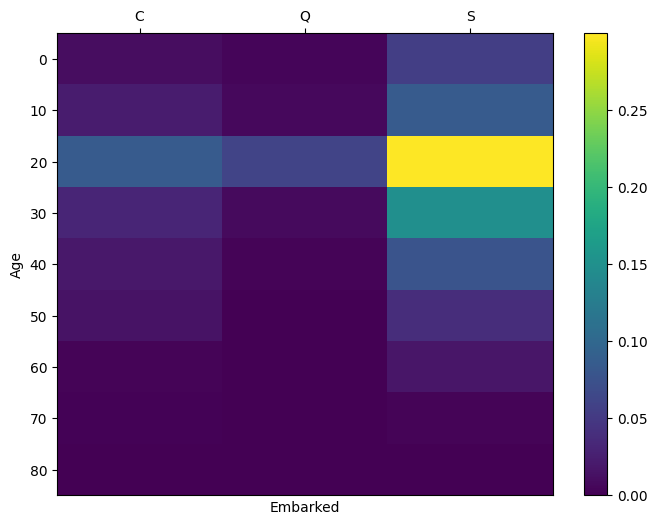

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

row, col = p_XY_df.shape

# 마지막 행과 열 제외
row -= 1
col -= 1

# 히트맵
c = ax.pcolor(p_XY_df.iloc[:row, :col])

# 축 눈금 지정
ax.set_xticks(np.arange(col) + 0.5, minor=False)
ax.set_yticks(np.arange(row) + 0.5, minor=False)

xlabels = p_XY_df.columns[:-1]
ylabels = p_XY_df.index[:-1]

ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

ax.invert_yaxis() # 소득 범주 위에서부터
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False) # x-축 눈금 위쪽으로

ax.set_xlabel('Embarked')
ax.set_ylabel('Age')

fig.colorbar(c, ax=ax) # 색 기둥

plt.show()

(5) 이산 결합 확률 변수 $(X, Y)$에 대한 조건부 확률 질량 함수를 선언한 다음에
사우샘튼(Southampton)에서 탑승한 사람이 40대일 확률을 계산하여라.

답:

탑승 항구를 가리키는 확률 변수 $Y$를 조건으로 하는 조건부 확률의 확률 질량 함수는 다음과 같다.

In [38]:
p_Y = f_embarked

def p_XconY(x, y):
    return p_XY(x, y) / p_Y(y)

- 사우샘튼(Southampton)에서 탑승한 사람이 40대일 확률

In [39]:
p_XconY(40, 'S')

0.106811

(6) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 질량 함수 `p_XY()`로부터 각 확률 변수에 대한 확률 질량 함수를 정의한 다음에
앞서 선언한 각 확률 변수에 대한 확률 질량 함수와 (거의) 동일함을 보이는 코드를 구현하여라.

답: 

- 확률 변수 $X$의 주변 확률 질량 함수

In [40]:
embarked = cats_crossed.columns[:-1]

def f_X(x):
    prob_x = np.array([p_XY(x, y) for y in embarked])
    return prob_x.sum()

- 확률 변수 $Y$의 주변 확률 질량 함수

In [41]:
ages = cats_crossed.index[:-1]

def f_Y(y):
    prob_y = np.array([p_XY(x, y) for x in ages])
    return prob_y.sum()

앞서 선언한 `f_age()`가 나이대 확률 변수 $X$에 대한 확률 밀도 함수를 `p_X`로 선언한다.

In [42]:
p_X = f_age

그러면 `f_X()`와 `p_X()`가 거의 동일한 값을 계산한다.

In [43]:
np.allclose([f_X(x) for x in ages], [p_X(x) for x in ages])

True

`f_Y()`와 `p_Y()`도 거의 동일한 값을 계산한다.

In [44]:
np.allclose([f_Y(y) for y in embarked], [p_Y(y) for y in embarked])

True